# MODELO CLASIFICADOR XGBOOST - FEATURE SELECTION

Ayuda para la realización de este notebook: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

De los 3 casos analizados, el mejor modelo es **XGBOOST** con **n_estimators=500**. De aquí en adelante tan solo analizaré mejoras en este modelo.

#### Memoria de lo realizado hasta ahora:

* Se comprobó en el notebook *Modelo_clasificador_3.ipynb* que resultaba algo mejor utilizar un tamaño de 2 años y descartar el 1 año del dataset por tratarse de un escenario muy distinto al actual.

* Se eliminó la variable *ACOPLADO_FR* al no aportar ninguna mejora para evitar considerar ruido.

Al entrenar el modelo XGBoost en *Modelo_clasificador_3.ipynb* y recuperar la importancia de los features que lo componen, se vió como realmente había 5 variables que resaltaban frente a las demás. En este notebook recupero este modelo (guardado en path='/Users/blancabengoa/Desktop/KSchool/TFM/Modelo3/') y la división de train-test utilizada y analizo si mejoraría mi accuracy si solo me quedase con las variables más importantes. 

Aunque no se trata de un dataset con un excesivo número de características, compruebo que el hecho de considerar "ruido" no distorsione mi resultado.

**Librerías necesarias**

In [22]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import altair as alt

%matplotlib inline
plt.style.use('ggplot')

#Librerías para modelos

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [4]:
pd.options.display.max_columns= None

Descargo los resultados de *Modelo_Clasificador_3.ipynb*

In [5]:
path='/Users/blancabengoa/Desktop/KSchool/TFM/Modelo3/'

In [6]:
X_train = pickle.load(open(path + "X_train.pkl","rb"))
X_test = pickle.load(open(path + "X_test.pkl","rb"))
y_train = pickle.load(open(path + "y_train.pkl","rb"))
y_test = pickle.load(open(path + "y_test.pkl","rb"))

In [8]:
model=pickle.load(open(path + "clfxb_3.pkl","rb"))

### Recupero resultados del modelo:

#### 1) Parámetros

In [10]:
print(model.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


#### 2) Accuracy, classification report

In [19]:
print('Accuracy: %.2f' %(accuracy_score(y_test, model.predict(X_test))))
print(classification_report(y_test,model.predict(X_test)))

Accuracy: 0.70
             precision    recall  f1-score   support

          0       0.70      0.55      0.62      1518
          1       0.71      0.82      0.76      1986

avg / total       0.70      0.70      0.70      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### 3) Importancia de las variables en el modelo:

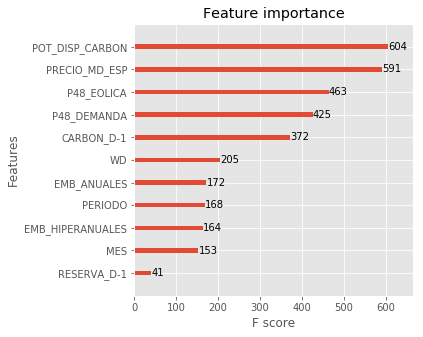

In [18]:
plot_importance(model)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

#### 4) Feature selection

Utilizo SelectFromModel de la librería sklearn:

In [28]:
thresholds = sorted(model.feature_importances_)
thresholds

[0.012209648,
 0.045562834,
 0.048838593,
 0.05002978,
 0.051220965,
 0.061048243,
 0.110780224,
 0.12656343,
 0.13787968,
 0.17599761,
 0.17986897]

In [31]:
for t in thresholds:
    selection = SelectFromModel(model, threshold=t, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # Entreno con el nuevo set de training:
    selection_model = XGBClassifier(n_estimators=500,random_state=42)
    selection_model.fit(select_X_train, y_train)
    # Resultados:
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (t, select_X_train.shape[1], accuracy*100.0))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.012, n=11, Accuracy: 70.41%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.046, n=10, Accuracy: 70.03%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.049, n=9, Accuracy: 70.15%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.050, n=8, Accuracy: 69.49%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.051, n=7, Accuracy: 69.24%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.061, n=6, Accuracy: 68.98%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.111, n=5, Accuracy: 66.47%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.127, n=4, Accuracy: 67.21%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.138, n=3, Accuracy: 66.55%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.176, n=2, Accuracy: 66.47%
Thresh=0.180, n=1, Accuracy: 67.32%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


He comprobado que mi accuracy empeora si disminuyo el número de features, a pesar de tener una importancia baja en el modelo.

Podría eliminar RESERVA_D-1 y MES y mi accuracy apenas se vería alterado (de 70,41% a 70,15%). Como tampoco me supone una pérdida de rendimiento en el training importante al no tener un número elevado de features, decido mantenerlas en el modelo.